## 1. Import libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile , chi2
from pylab import *
import warnings
warnings.filterwarnings('ignore')

## 2. Reading Data

In [2]:
data=pd.read_csv('Brain Tumor.csv')

## 3. Data Exploration

In [3]:
data.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

### Observation
>#### All dataset is  numeric
>#### No Missing values in dataset

In [5]:
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [6]:
data.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155
3761,Image3762,0,6.110138,480.884025,21.929068,0.118171,4.110669,17.538826,239.251388,0.306224,0.093773,0.494333,6.787329,0.938731,7.458341e-155


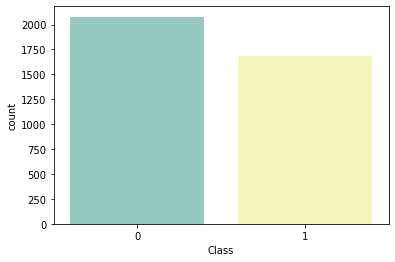

In [7]:
sns.countplot(data['Class'],label="Count",palette="Set3")
plt.show()

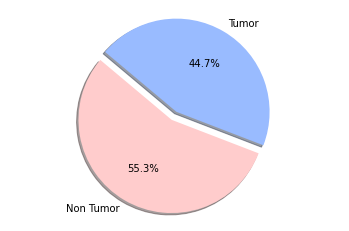

In [8]:
labels =["Non Tumor","Tumor"]
sizes = data['Class'].value_counts(sort = False)
colors = ["#ffcccc","#99bbff"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
Tumor = data[data.Class == 1]
Tumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
9,Image10,1,8.476196,1095.785127,33.102645,0.003002,4.365000,19.682514,72.588783,0.045685,0.002087,0.361432,4.590795,0.967830,7.458341e-155
10,Image11,1,9.804611,1114.829653,33.389065,0.002436,3.872728,15.552862,66.285462,0.041140,0.001692,0.375618,4.626763,0.968750,7.458341e-155
11,Image12,1,12.326782,1150.677144,33.921632,0.003769,3.623978,14.762270,165.484791,0.051321,0.002634,0.385292,5.215436,0.958601,7.458341e-155


In [10]:
Non_Tumor = data[data.Class == 0]
Non_Tumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
5,Image6,0,7.524109,607.395258,24.645390,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155
6,Image7,0,12.304413,922.746138,30.376737,0.128833,2.930095,8.969348,115.203118,0.320675,0.102832,0.532292,4.880320,0.974745,7.458341e-155


## 4. Remove Identifier Feature

In [11]:
data = data.drop(data[['Image']],axis=1)

## 5. Rename columns
Rename 'Standard Deviation' column to 'StandardDeviation'

In [12]:
data.columns=['Class','Mean', 'Variance', 'StandardDeviation', 'Entropy','Skewness', 
              'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity','Dissimilarity', 'Correlation', 'Coarseness']

## 6. Copy Dataset

In [13]:
dataCopied=data.copy()

## 7. Class Distribution

In [14]:
X = dataCopied.drop(["Class"], axis = 1)
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,shuffle = True, random_state = 8)

y_train["Class"].value_counts()

0    1559
1    1262
Name: Class, dtype: int64

## 8. Data Preprocessing on Training Dataset

### 8.1 Copy Training dataset

In [15]:
X_train_Clean=X_train.copy()

### 8.2 Outliers

In [16]:
Q1 = X_train_Clean.quantile(0.25)
Q3 = X_train_Clean.quantile(0.75)
IQR = Q3 - Q1

print('\nIdentifing outliers with IQR\n')
print(IQR)

print('\n\nIdentifing outliers with skewness\n')
print(X_train_Clean.skew()) 


Identifing outliers with IQR

Mean                   8.463226
Variance             601.744819
StandardDeviation     11.973318
Entropy                0.105463
Skewness               2.075322
Kurtosis              15.640092
Contrast              89.663258
Energy                 0.225957
ASM                    0.083808
Homogeneity            0.206558
Dissimilarity          2.295542
Correlation            0.023450
Coarseness             0.000000
dtype: float64


Identifing outliers with skewness

Mean                  0.734735
Variance              1.044936
StandardDeviation     0.174305
Entropy               0.965433
Skewness              4.348963
Kurtosis             11.579986
Contrast             10.991484
Energy                0.185026
ASM                   1.114823
Homogeneity          -0.294471
Dissimilarity         2.188281
Correlation          -5.233826
Coarseness            0.000000
dtype: float64


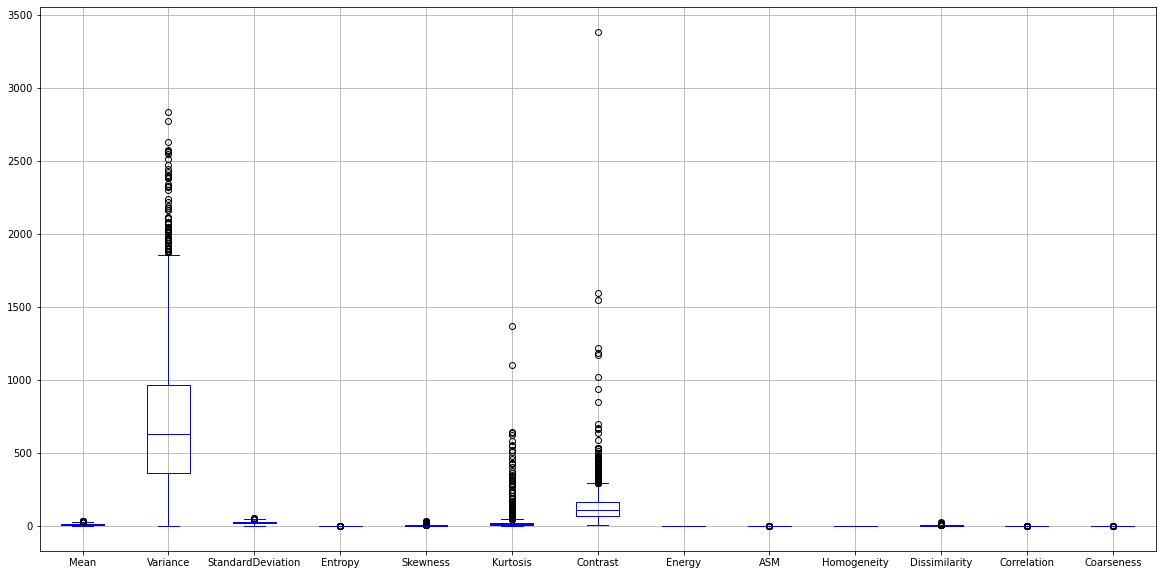

In [17]:
num_cols =X_train_Clean.columns

X_train_Clean[num_cols].boxplot(figsize =(20,10),color='blue')
plt.show()

###  Solutions: Quantile-based Flooring and Capping

In [18]:
def Outlier_Tratement (*features):
    for feature in features:
        minimum=X_train_Clean[feature].quantile(0.10)
        maximum=X_train_Clean[feature].quantile(0.90)

        Q1=X_train_Clean[feature].quantile(0.25)
        Q3=X_train_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR

        X_train_Clean[feature]= np.where(X_train_Clean[feature] < Min,minimum,X_train_Clean[feature])
        X_train_Clean[feature]= np.where(X_train_Clean[feature] > Max,maximum,X_train_Clean[feature])
        
for s in X_train_Clean.columns:
    Outlier_Tratement(s)

In [19]:
print(X_train_Clean.skew()) 

Mean                 0.547997
Variance             0.590240
StandardDeviation    0.107950
Entropy              0.767304
Skewness             0.820839
Kurtosis             1.110304
Contrast             0.572341
Energy               0.185026
ASM                  0.817847
Homogeneity         -0.294471
Dissimilarity        0.311483
Correlation         -0.636041
Coarseness           0.000000
dtype: float64


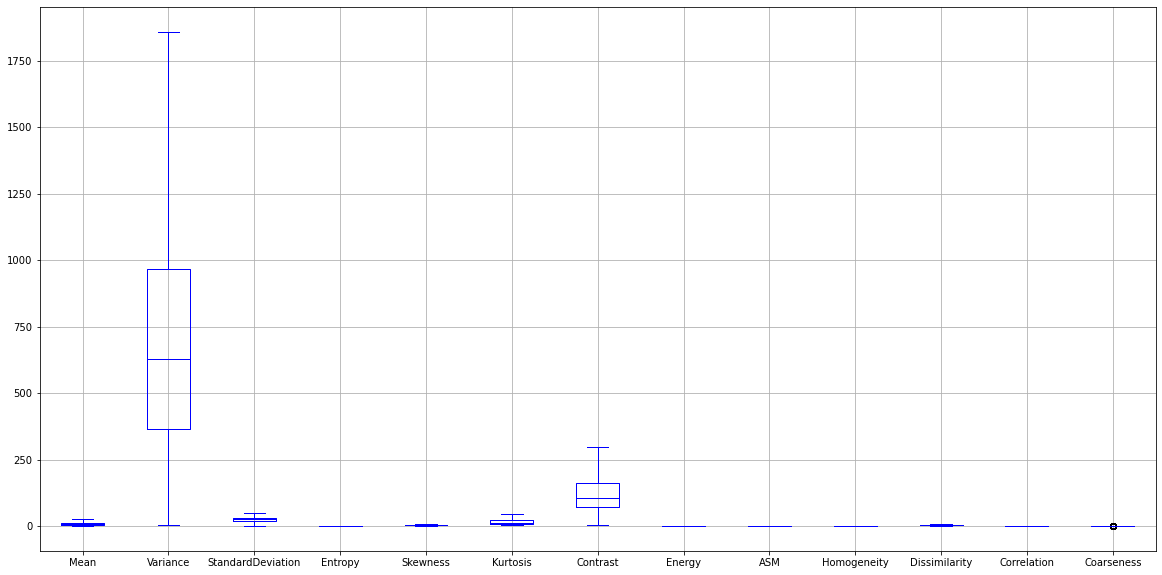

In [20]:
num_cols =X_train_Clean.columns

X_train_Clean[num_cols].boxplot(figsize =(20,10),color='blue')
plt.show()

### Other methods have been tried

#### Log Transformation

In [21]:
def logTransformation(*features):
    for feature in features:
        X_train_Clean[feature]= X_train_Clean[feature].map( lambda i: np.log(i) if i > 0 else 0 )
        
#for s in X_train_Clean.columns:
#    logTransformation(s)

#### Replace with Median

In [22]:
def Median (*features):
    for feature in features:
        median=X_train_Clean[feature].quantile(0.50)
        
        Q1=X_train_Clean[feature].quantile(0.25)
        Q3=X_train_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR
        
        X_train_Clean[feature]= np.where(X_train_Clean[feature] < Min,median,X_train_Clean[feature])
        X_train_Clean[feature]= np.where(X_train_Clean[feature] > Max,median,X_train_Clean[feature])
        
#for s in X_train_Clean.columns:
#    Median(s)

### 8.3 Data Scaling

In [23]:
X_train_Clean.var()

Mean                     30.824971
Variance             174075.643298
StandardDeviation        74.176585
Entropy                   0.004391
Skewness                  2.075043
Kurtosis                158.147970
Contrast               3887.294487
Energy                    0.016428
ASM                       0.002860
Homogeneity               0.016037
Dissimilarity             2.438414
Correlation               0.000265
Coarseness                0.000000
dtype: float64

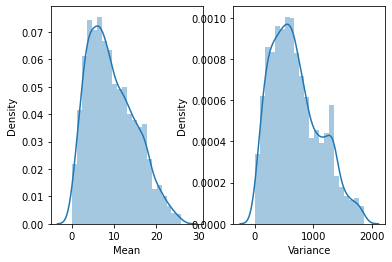

In [24]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax= sns.distplot(X_train_Clean['Variance'])

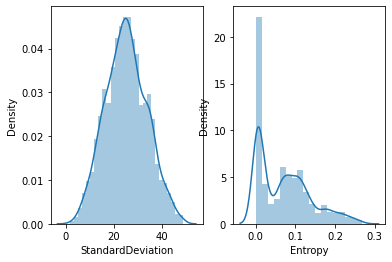

In [25]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

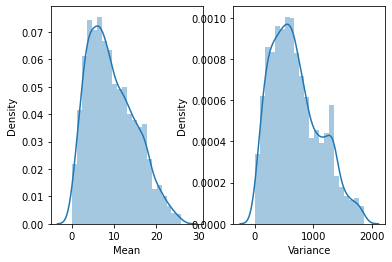

In [26]:
subplot(1,2,1)
ax= sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Variance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

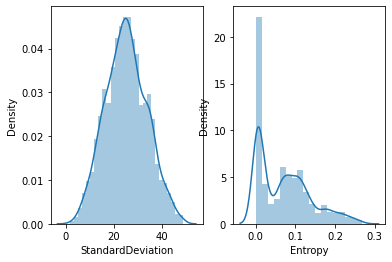

In [27]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

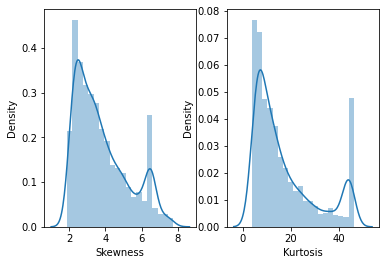

In [28]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Skewness'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Kurtosis'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

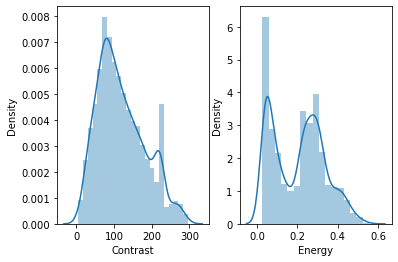

In [29]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Contrast'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Energy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

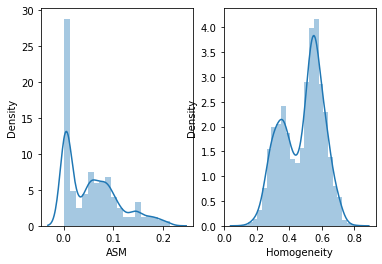

In [30]:
subplot(1,2,1)                    
ax=sns.distplot(X_train_Clean['ASM'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Homogeneity'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

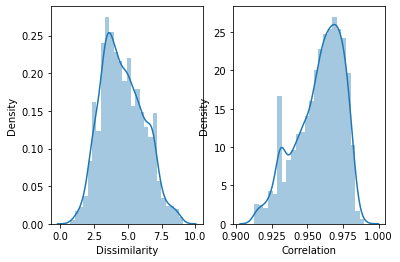

In [31]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Dissimilarity'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Correlation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

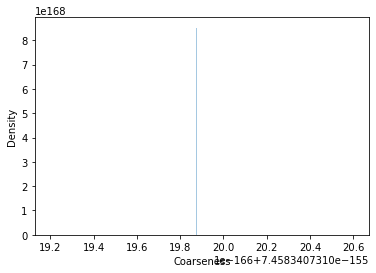

In [32]:
ax=sns.distplot(X_train_Clean['Coarseness'])
plt.show

### Solution: Normalization

In [33]:
cols = X_train_Clean.columns
scaler = preprocessing.MinMaxScaler()

dataScaler = scaler.fit_transform(X_train_Clean)
dataScaler = pd.DataFrame(dataScaler , columns =cols)

X_train_Clean=dataScaler.copy()
X_train_Clean.head()

,Mean,Variance,StandardDeviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0.228230,0.263828,0.432081,0.526496,0.372780,0.308959,0.790197,0.589501,0.531310,0.652387,0.583817,0.396657,0.0
1,0.211161,0.184338,0.355551,0.309562,0.320679,0.253434,0.561996,0.433657,0.301830,0.622590,0.495548,0.164221,0.0
2,0.767072,0.583300,0.659520,0.275598,0.030446,0.014712,0.356272,0.404942,0.266528,0.591146,0.389320,0.663584,0.0
3,0.273887,0.335129,0.491389,0.420700,0.321226,0.247641,0.585266,0.516761,0.416237,0.763207,0.304827,0.609730,0.0
4,0.483291,0.389759,0.532671,0.395364,0.135077,0.087236,0.243825,0.500385,0.392254,0.594519,0.409496,0.808901,0.0


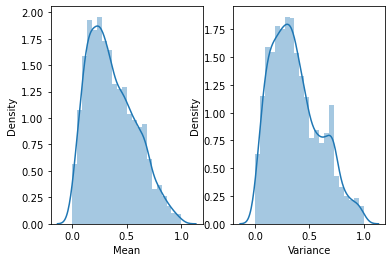

In [34]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax= sns.distplot(X_train_Clean['Variance'])

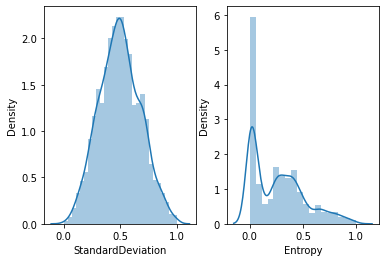

In [35]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

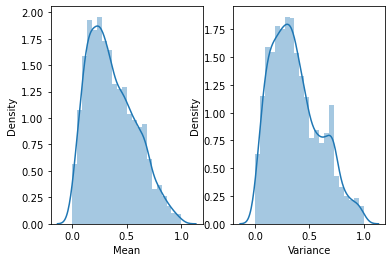

In [36]:
subplot(1,2,1)
ax= sns.distplot(X_train_Clean['Mean'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Variance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

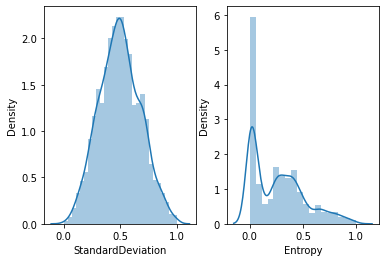

In [37]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['StandardDeviation'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Entropy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

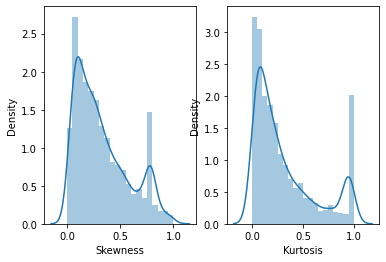

In [38]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Skewness'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Kurtosis'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

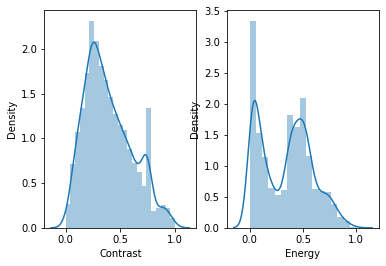

In [39]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Contrast'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Energy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

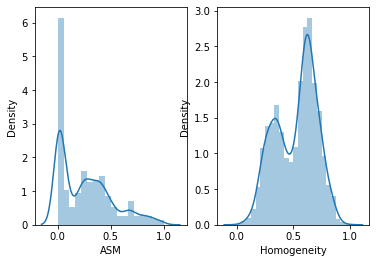

In [40]:
subplot(1,2,1)                    
ax=sns.distplot(X_train_Clean['ASM'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Homogeneity'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

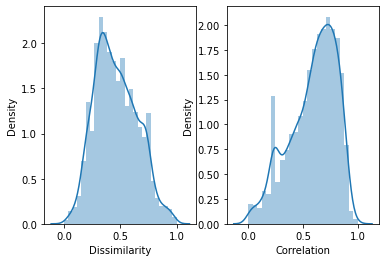

In [41]:
subplot(1,2,1)
ax=sns.distplot(X_train_Clean['Dissimilarity'])

subplot(1,2,2)
ax=sns.distplot(X_train_Clean['Correlation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

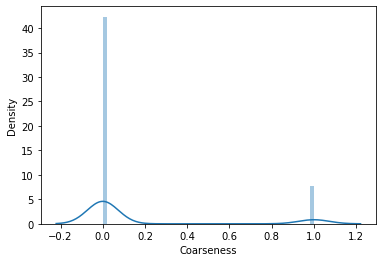

In [42]:
ax=sns.distplot(X_train_Clean['Coarseness'])
plt.show

### Other methods have been tried
#### Standardization 

In [43]:
#cols = X_train_Clean.columns
#scaler = preprocessing.StandardScaler()

#dataScaler = scaler.fit_transform(X_train_Clean)
#dataScaler = pd.DataFrame(dataScaler , columns =cols)

#X_train_Clean=dataScaler.copy()
#X_train_Clean.describe()

### 8.4  Feature Selection
### Correlation

In [44]:
X_train_Clean['Class']=y_train['Class']
corr_matrix = X_train_Clean.corr()
corr_matrix

,Mean,Variance,StandardDeviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
Mean,1.000000,0.766947,0.779143,-0.071068,-0.776992,-0.738730,0.043028,0.004491,-0.075730,0.113867,-0.079459,0.282954,-0.017051,0.002178
Variance,0.766947,1.000000,0.974251,-0.338492,-0.364042,-0.367432,0.336861,-0.324934,-0.335643,-0.288137,0.332180,0.318924,0.014090,0.006784
StandardDeviation,0.779143,0.974251,1.000000,-0.330553,-0.390221,-0.394899,0.328542,-0.314459,-0.327663,-0.280575,0.327119,0.351123,0.013576,-0.000015
Entropy,-0.071068,-0.338492,-0.330553,1.000000,-0.297167,-0.324197,-0.210698,0.971194,0.994600,0.856514,-0.550909,0.151564,-0.165065,0.013379
Skewness,-0.776992,-0.364042,-0.390221,-0.297167,1.000000,0.988297,0.286349,-0.388739,-0.288186,-0.555493,0.521501,-0.285240,0.071173,-0.009067
Kurtosis,-0.738730,-0.367432,-0.394899,-0.324197,0.988297,1.000000,0.282627,-0.408286,-0.315928,-0.574721,0.527569,-0.302848,0.082051,-0.011060
Contrast,0.043028,0.336861,0.328542,-0.210698,0.286349,0.282627,1.000000,-0.207234,-0.205785,-0.363616,0.769105,-0.426308,0.014380,-0.014334
Energy,0.004491,-0.324934,-0.314459,0.971194,-0.388739,-0.408286,-0.207234,1.000000,0.964808,0.913806,-0.597289,0.139937,-0.172613,0.013535
ASM,-0.075730,-0.335643,-0.327663,0.994600,-0.288186,-0.315928,-0.205785,0.964808,1.000000,0.847232,-0.541625,0.151194,-0.164102,0.012542
Homogeneity,0.113867,-0.288137,-0.280575,0.856514,-0.555493,-0.574721,-0.363616,0.913806,0.847232,1.000000,-0.792049,0.169307,-0.163604,0.020412


In [45]:
corr_matrix['Class'].sort_values(ascending= False)

Class                1.000000
Homogeneity          0.020412
Energy               0.013535
Entropy              0.013379
ASM                  0.012542
Variance             0.006784
Mean                 0.002178
Correlation          0.000340
StandardDeviation   -0.000015
Skewness            -0.009067
Kurtosis            -0.011060
Coarseness          -0.013940
Contrast            -0.014334
Dissimilarity       -0.028006
Name: Class, dtype: float64

### Observation:
#### [ Homogeneity, Energy, Entropy, ASM, Variance, Mean, Correlation ] : Positive Correlation
#### [ StandardDeviation, Skewness, Kurtosis, Coarseness,  Contrast, Dissimilarity ] : Negative Correlation

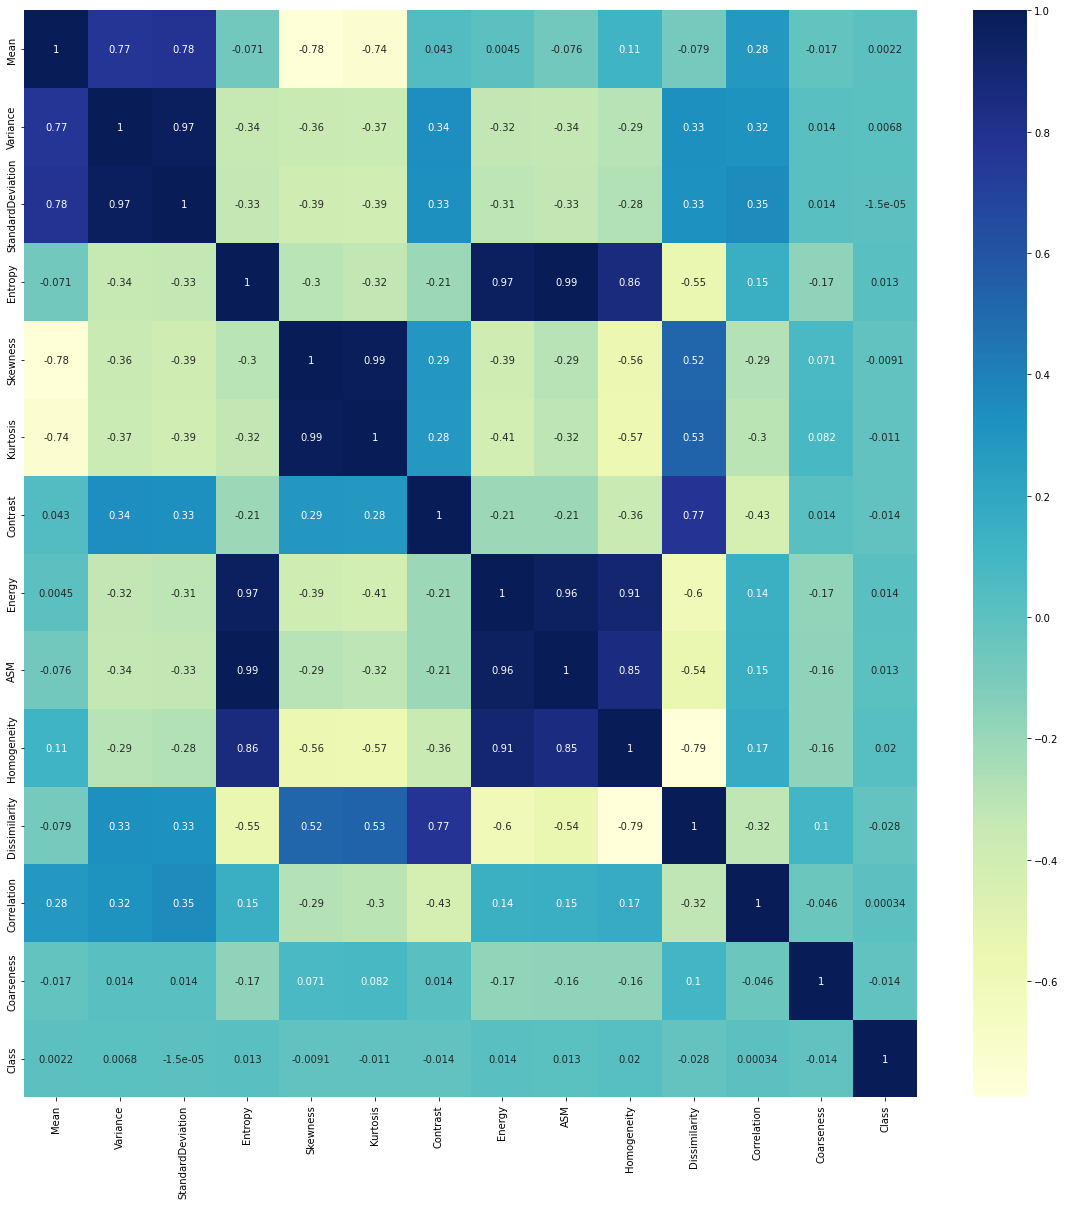

In [47]:
sns.heatmap(X_train_Clean.corr(),cmap='YlGnBu',annot=True)
plt.rcParams["figure.figsize"]=(20,20)
plt.show()

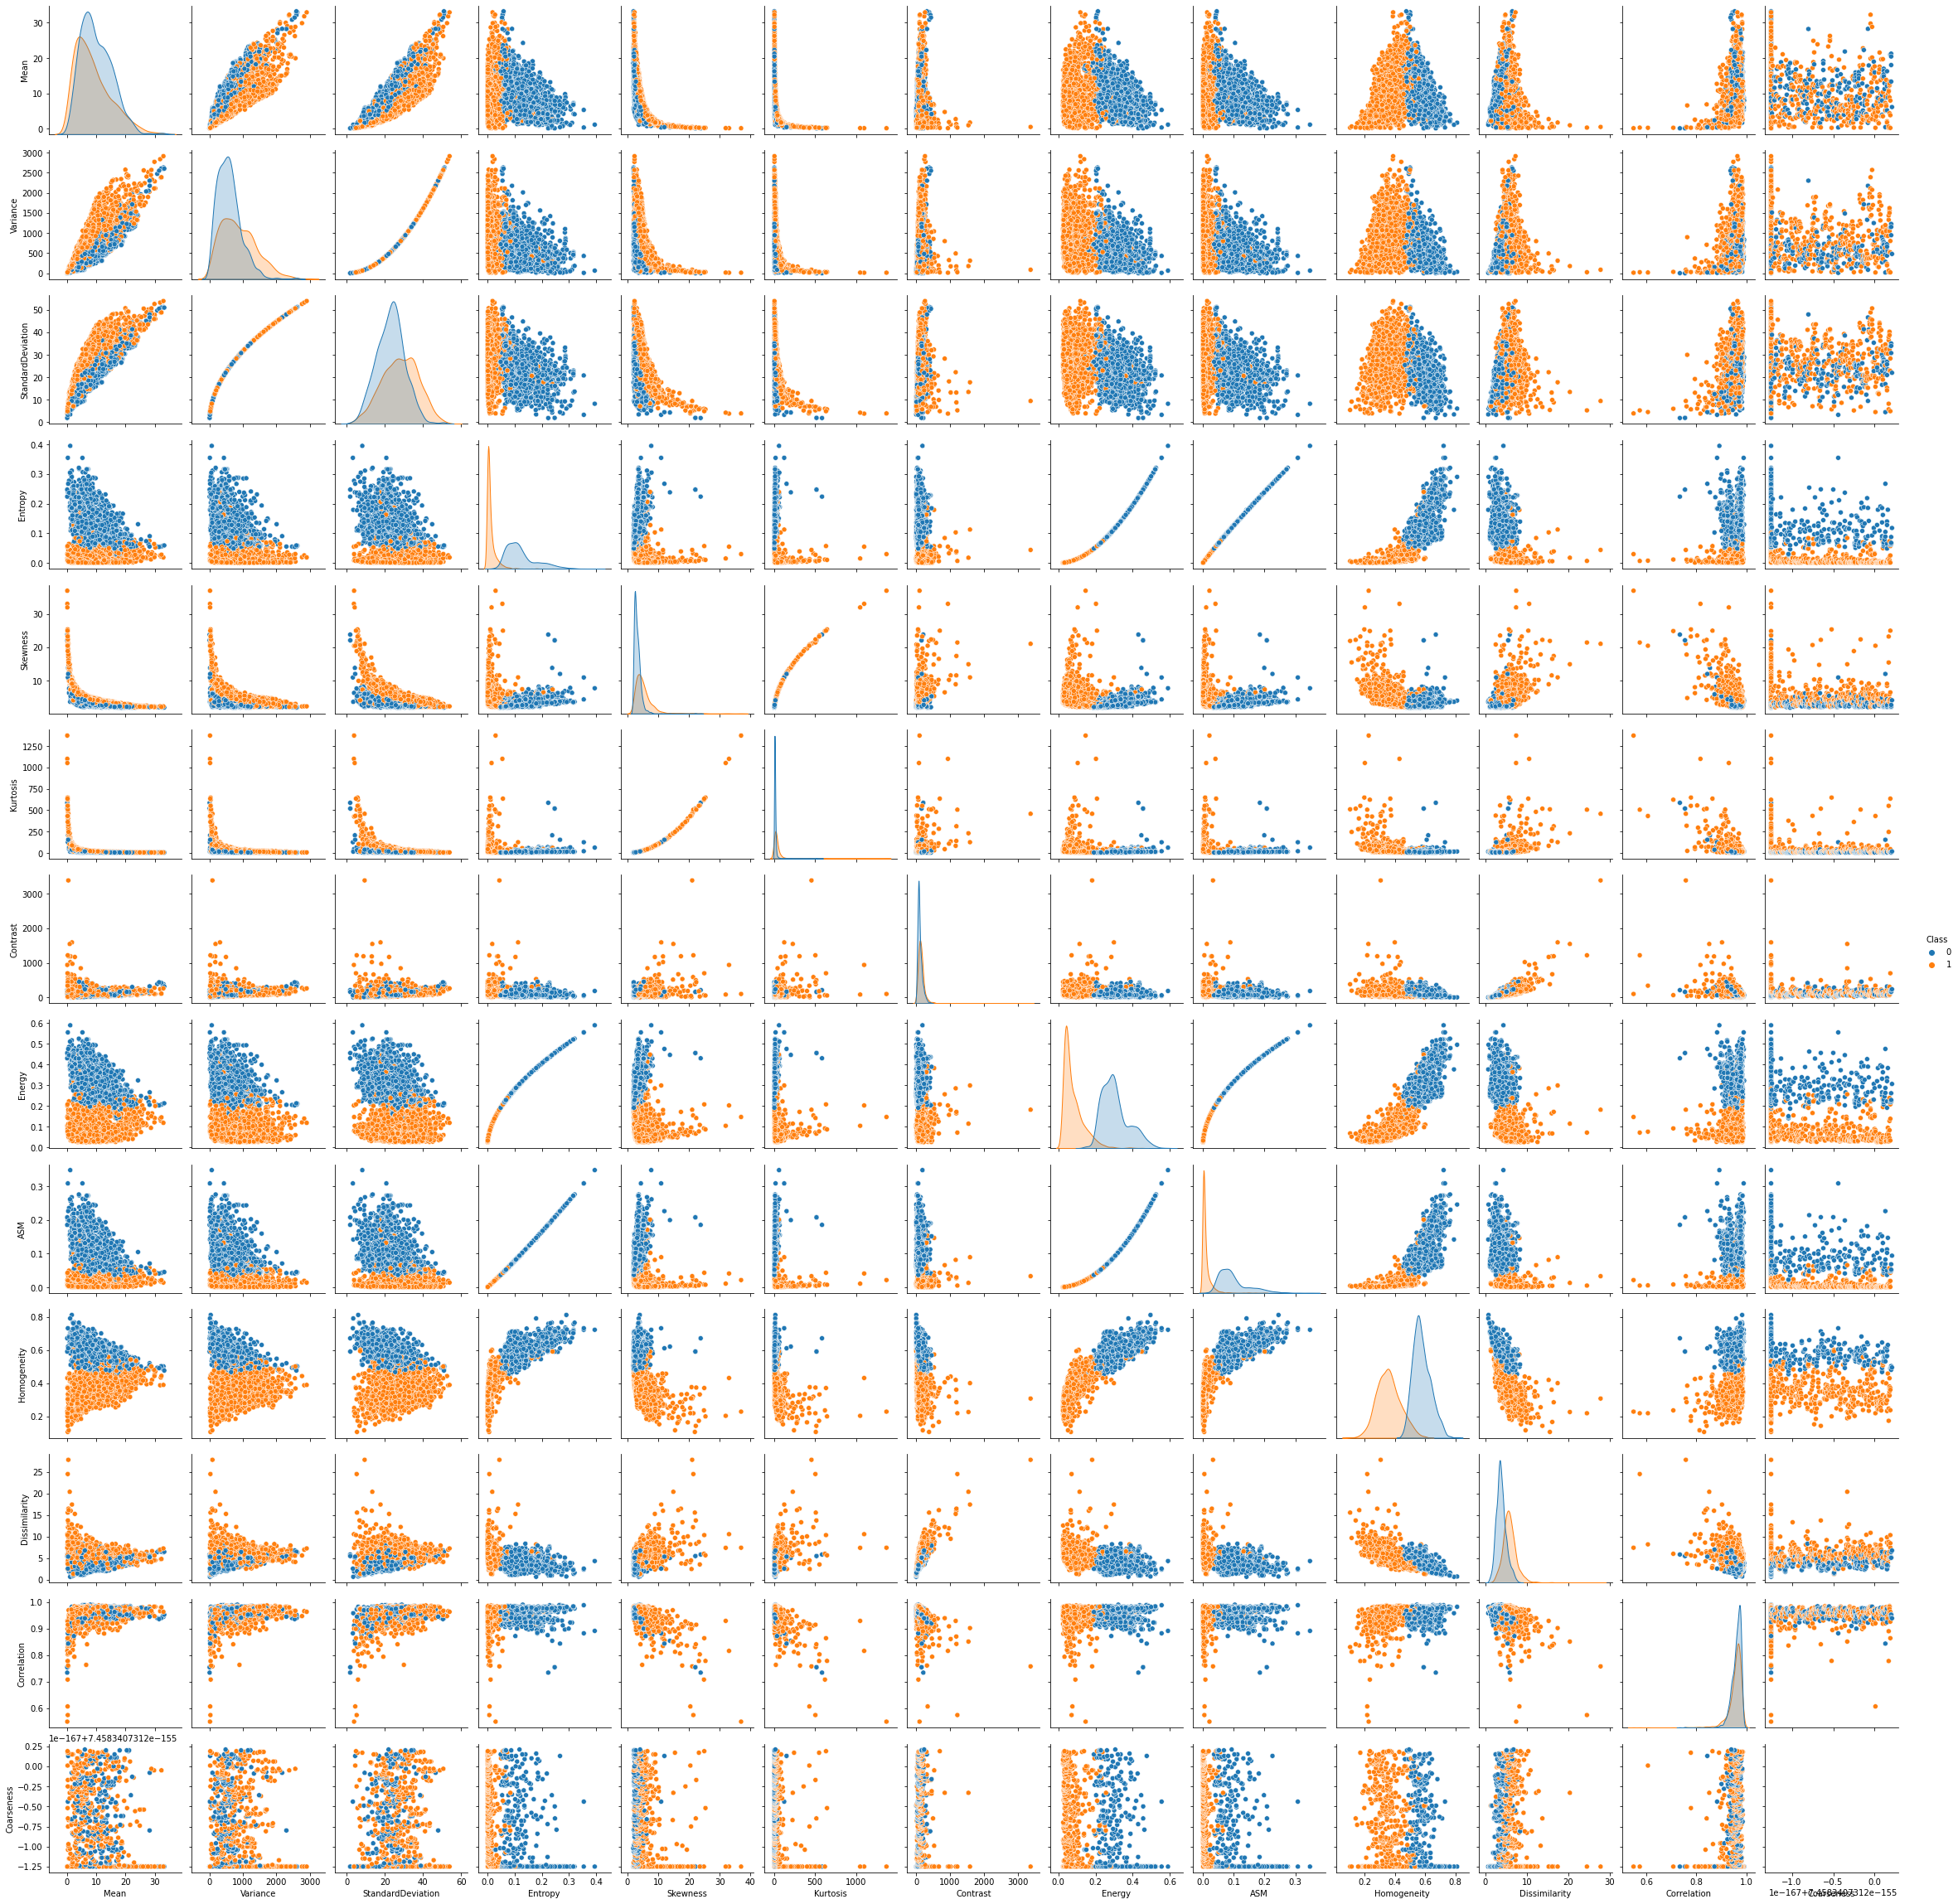

In [48]:
sns.pairplot(dataCopied, hue = 'Class')

## Solution

In [46]:
X_train_Clean= X_train_Clean.drop('Class', axis=1)

In [47]:
print(X_train_Clean.columns,'\n')

featureSelection = SelectPercentile ( score_func=chi2 , percentile=95)
f = featureSelection.fit_transform(X_train_Clean,y_train)
print(featureSelection.get_support())

Index(['Mean', 'Variance', 'StandardDeviation', 'Entropy', 'Skewness',
       'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity',
       'Correlation', 'Coarseness'],
      dtype='object') 

[ True  True  True  True  True  True  True  True  True  True  True False
  True]


In [48]:
X_train_Clean = X_train_Clean.drop(columns=['Correlation'])

## 9. Data Preprocessing on Test Dataset

### 9.1 Copy Test dataset

In [49]:
X_test_Clean= X_test.copy()

### 9.2 Outliers

In [50]:
def Outlier_Tratement (*features):
    for feature in features:
        minimum=X_test_Clean[feature].quantile(0.10)
        maximum=X_test_Clean[feature].quantile(0.90)

        Q1=X_test_Clean[feature].quantile(0.25)
        Q3=X_test_Clean[feature].quantile(0.75)
        IQR = Q3-Q1

        Min = Q1 - 1.5 * IQR  
        Max = Q3 + 1.5 * IQR

        X_test_Clean[feature]= np.where(X_test_Clean[feature] < Min,minimum,X_test_Clean[feature])
        X_test_Clean[feature]= np.where(X_test_Clean[feature] > Max,maximum,X_test_Clean[feature])
        
for s in X_test_Clean.columns:
    Outlier_Tratement(s)

In [51]:
print(X_test_Clean.skew()) 

Mean                 0.547022
Variance             0.622482
StandardDeviation    0.108429
Entropy              0.780704
Skewness             0.786603
Kurtosis             1.143635
Contrast             0.557046
Energy               0.189743
ASM                  0.831180
Homogeneity         -0.265775
Dissimilarity        0.297278
Correlation         -0.780107
Coarseness           0.000000
dtype: float64


### 9.3 Normalization

In [52]:
cols = X_test_Clean.columns
scaler = preprocessing.MinMaxScaler()

dataScaler = scaler.fit_transform(X_test_Clean)
dataScaler = pd.DataFrame(dataScaler , columns =cols)

X_test_Clean=dataScaler.copy()
X_test_Clean.head()

,Mean,Variance,StandardDeviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0.244077,0.164605,0.338350,0.363900,0.267857,0.193190,0.284021,0.454081,0.360148,0.628084,0.395961,0.556519,0.0
1,0.159393,0.135193,0.303331,0.326603,0.462797,0.405169,0.166970,0.426750,0.321392,0.714324,0.260835,0.881265,0.0
2,0.353530,0.581601,0.668048,0.003309,0.456270,0.406778,0.750059,0.018789,0.002926,0.308053,0.908280,0.628775,0.0
3,0.273157,0.205005,0.381734,0.403156,0.283746,0.209788,0.372241,0.483473,0.404269,0.641521,0.444309,0.573744,0.0
4,0.042926,0.034380,0.136678,0.645590,0.830496,0.996295,0.646800,1.000000,0.670456,0.899998,0.429511,0.282804,0.0


### 9.4 Feature Selection

In [53]:
X_test_Clean = X_test_Clean.drop('Correlation' , axis=1)

# Models  

## Cross Validation

In [54]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Perceptron',Perceptron()))

MLA_columns=[]
MLA_compare = pd.DataFrame(columns = MLA_columns)
results = []

kfold = model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
row_index=0
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train_Clean, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    MLA_compare.loc[row_index, 'Algorithm'] = name
    MLA_compare.loc[row_index, 'Mean'] = cv_results.mean()
    MLA_compare.loc[row_index, 'Standard Deviation'] = cv_results.std()

    row_index+=1
    
MLA_compare.sort_values(by = ['Mean'], ascending = False, inplace = True)    
MLA_compare  

,Algorithm,Mean,Standard Deviation
2,Random Forest,0.985818,0.005937
1,Decision Tree,0.981918,0.006485
0,KNN,0.980855,0.004262
3,Naive Bayes,0.974474,0.005458
4,Perceptron,0.965963,0.017284


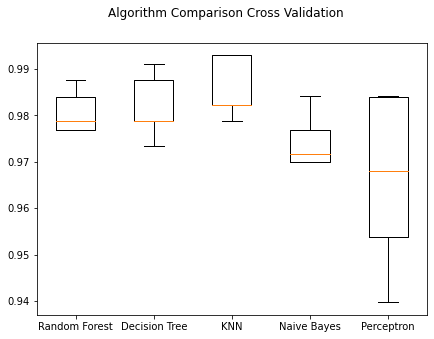

In [56]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(MLA_compare['Algorithm'])
plt.rcParams["figure.figsize"]=(7,5)
plt.show()

## Fine Tuning

### 1. Decision Tree

In [57]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid=params, verbose=1, cv=kfold)
search = grid_search_cv.fit(X_train_Clean,y_train)

final_model = search.best_estimator_
print(final_model)    

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
DecisionTreeClassifier(max_leaf_nodes=9, random_state=123)


In [58]:
dt = DecisionTreeClassifier(max_leaf_nodes=9, random_state=123)
dt.fit(X_train_Clean,y_train)

dt_fit= dt.score(X_train_Clean,y_train)
dt_acc= dt.score(X_test_Clean,y_test)
print("Train Accuracy: ",dt_fit)
print("Test Accuracy: ",dt_acc)

# Metrics
dt_y_pred = dt.predict(X_test_Clean)
dt_precision_score = precision_score(y_test, dt_y_pred)
dt_recall_score = recall_score(y_test, dt_y_pred)
fp1, tp1, th1 = roc_curve(y_test, dt_y_pred)
dt_auc = auc(fp1, tp1)

Train Accuracy:  0.9883020205600851
Test Accuracy:  0.9819341126461212


#### Model Evaluation

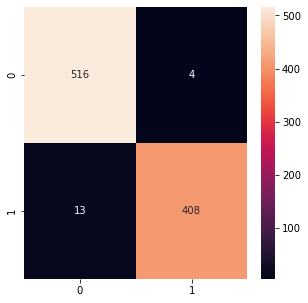

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       520
           1       0.99      0.97      0.98       421

    accuracy                           0.98       941
   macro avg       0.98      0.98      0.98       941
weighted avg       0.98      0.98      0.98       941



In [87]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),dt_y_pred), annot=True,fmt="d")
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

### 2. Naive Bayes

In [60]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB, cv=kfold,verbose=1, scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_train_Clean)
gs_NB.fit(Data_transformed, y_train);
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0657933224657568}

In [61]:
classifier = GaussianNB(var_smoothing= 0.0657933224657568)
classifier.fit(X_train_Clean, y_train)

nb_fit= classifier.score(X_train_Clean,y_train)
nb_acc= classifier.score(X_test_Clean,y_test)
print("Train Accuracy: ",nb_fit)
print("Test Accuracy: ",nb_acc)

# Metrics
nb_y_pred = classifier.predict(X_test_Clean)
nb_precision_score = precision_score(y_test, nb_y_pred)
nb_recall_score = recall_score(y_test, nb_y_pred)
fp2, tp2, th2 = roc_curve(y_test, nb_y_pred)
nb_auc = auc(fp2, tp2)

Train Accuracy:  0.9766040411201702
Test Accuracy:  0.973432518597237


#### Model Evaluation

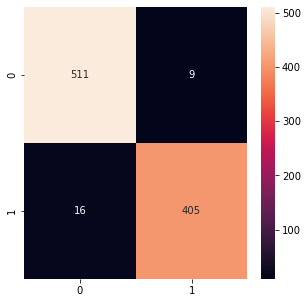

In [62]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),nb_y_pred), annot=True,fmt="d")
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

### 3. Preceptron

In [63]:
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

search = GridSearchCV(Perceptron(), grid, cv=kfold, n_jobs=-1)
result = search.fit(X_train_Clean, y_train)

final_model = result.best_params_
final_model

{'eta0': 0.0001}

In [64]:
p = Perceptron(eta0= 0.0001)
p.fit(X_train_Clean,y_train)

p_fit= p.score(X_train_Clean,y_train)
p_acc= p.score(X_test_Clean,y_test)
print("Train Accuracy: ",p_fit)
print("Test Accuracy: ",p_acc)

# Metrics
p_y_pred = p.predict(X_test_Clean)
p_precision_score = precision_score(y_test, p_y_pred)
p_recall_score = recall_score(y_test, p_y_pred)
fp3, tp3, th3 = roc_curve(y_test, p_y_pred)
p_auc = auc(fp3, tp3)

Train Accuracy:  0.9766040411201702
Test Accuracy:  0.9681190223166843


#### Model Evaluation

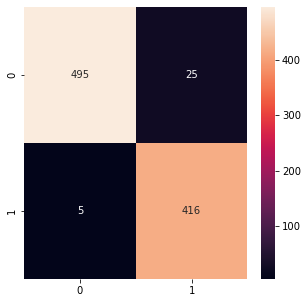

In [65]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),p_y_pred), annot=True,fmt="d")
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

### 4. KNN

In [66]:
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)  

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
result = grid.fit(X_train_Clean, y_train)
    
print(grid.best_score_)
print(grid.best_params_)

0.9822726416870646
{'n_neighbors': 3}


In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Clean, y_train)

knn_fit= knn.score(X_train_Clean,y_train)
knn_acc= knn.score(X_test_Clean,y_test)
print("Train Accuracy: ",knn_fit)
print("Test Accuracy: ",knn_acc)

# Metrics
knn_y_pred = knn.predict(X_test_Clean)
knn_precision_score = precision_score(y_test, knn_y_pred)
knn_recall_score = recall_score(y_test, knn_y_pred)
fp4, tp4, th4 = roc_curve(y_test, knn_y_pred)
knn_auc = auc(fp4, tp4)

Train Accuracy:  0.989365473236441
Test Accuracy:  0.9851222104144527


#### Model Evaluation

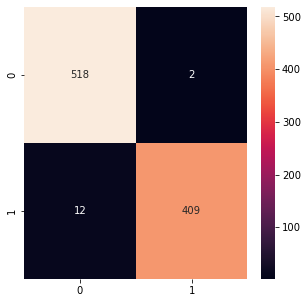

In [68]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),knn_y_pred), annot=True,fmt="d")
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

### 5. Random Forest

In [69]:
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=param_grid, cv=kfold)
result = cv_rfc.fit(X_train, y_train)

final_model = result.best_params_
final_model

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [70]:
clf=RandomForestClassifier(criterion= 'entropy',max_depth= 10, max_features= 'auto',n_estimators= 200)

clf.fit(X_train_Clean,y_train)

clf_fit= clf.score(X_train_Clean,y_train)
clf_acc= clf.score(X_test_Clean,y_test)
print("Train Accuracy: ",clf_fit)
print("Test Accuracy: ",clf_acc)

# Metrics
clf_y_pred = clf.predict(X_test_Clean)
clf_precision_score = precision_score(y_test, clf_y_pred)
clf_recall_score = recall_score(y_test, clf_y_pred)
fp5, tp5, th5 = roc_curve(y_test, clf_y_pred)
clf_auc = auc(fp5, tp5)

Train Accuracy:  0.999291031549096
Test Accuracy:  0.9861849096705633


#### Model Evaluation

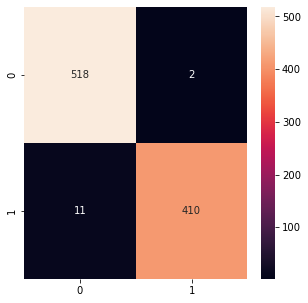

In [71]:
sns.heatmap(confusion_matrix(y_test.values.ravel(),clf_y_pred), annot=True,fmt="d")
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

## Conclusion model performance

## Model Comparison

In [79]:
names=['Random Forest','KNN','Decision Tree','Naive Bayes','Perceptron']
train_acc =[clf_fit, knn_fit , dt_fit , nb_fit,p_fit]
test_Acc = [clf_acc, knn_acc, dt_acc, nb_acc , p_acc]
precision = [clf_precision_score, dt_precision_score, knn_precision_score, nb_precision_score , p_precision_score ]
recall = [ clf_recall_score , dt_recall_score, knn_recall_score, nb_recall_score , p_recall_score]
auc = [clf_auc, knn_auc, dt_auc, nb_auc ,p_auc ]

dict={'Algorithim':names,'Train Accuracy':train_acc,'Test Accuracy':test_Acc,'Precision':precision,'Recall':recall,'AUC':auc}
MLA = pd.DataFrame(dict)

MLA.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA

,Algorithim,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,Random Forest,0.999291,0.986185,0.995146,0.973872,0.985013
1,KNN,0.989365,0.985122,0.990291,0.969121,0.983825
2,Decision Tree,0.988302,0.981934,0.995134,0.971496,0.980714
3,Naive Bayes,0.976604,0.973433,0.978261,0.961995,0.972344
4,Perceptron,0.976604,0.968119,0.943311,0.988124,0.970023


## By using Train Accuracy

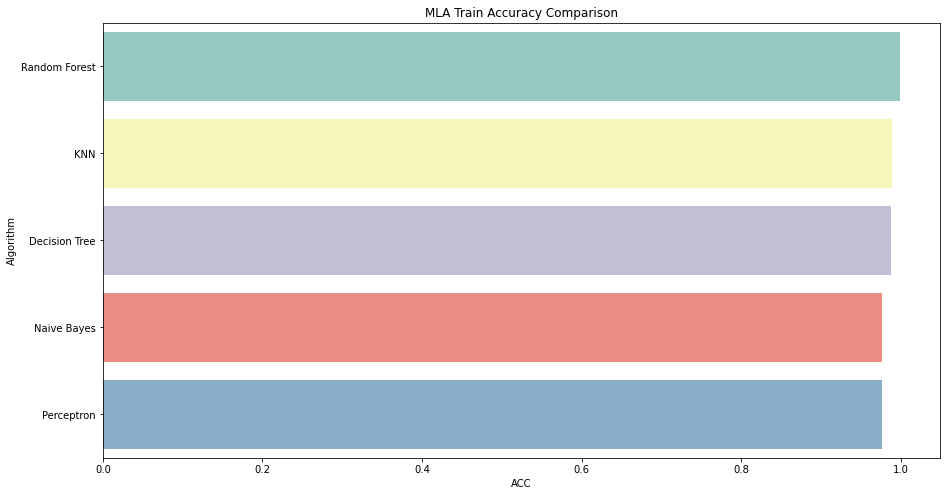

In [81]:
res = pd.DataFrame({"ACC":MLA['Train Accuracy'],"Algorithm":MLA['Algorithim']})
res["Type"]= "Train"
g = sns.barplot("ACC","Algorithm",data = res,palette="Set3",orient = "h")
g = g.set_title('MLA Train Accuracy Comparison')
rcParams['figure.figsize'] = 15,8

## By using Test Accuracy

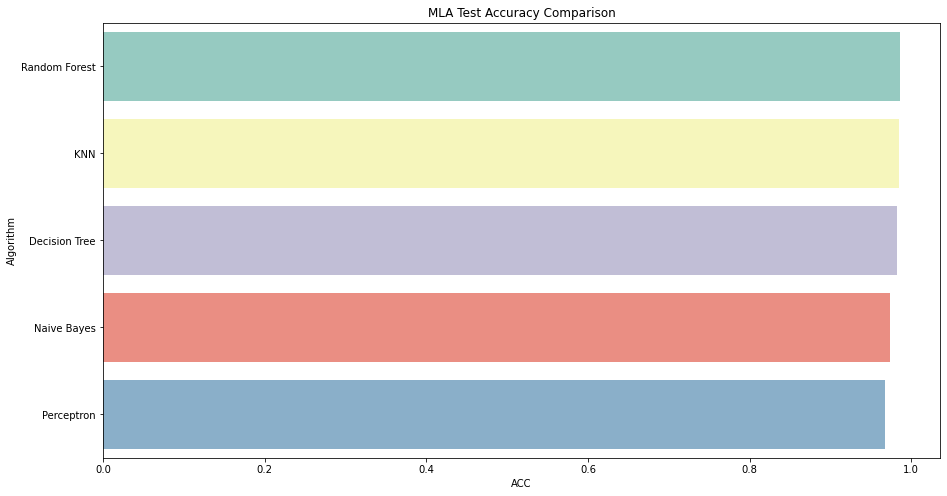

In [82]:
res1 = pd.DataFrame({"ACC":MLA['Test Accuracy'],"Algorithm":MLA['Algorithim']})
res1["Type"]= "test"
g = sns.barplot(x="ACC",y="Algorithm",data = res1,palette="Set3",orient = "h")
g = g.set_title('MLA Test Accuracy Comparison')
rcParams['figure.figsize'] = 15,8

## By using Cross Validation Score

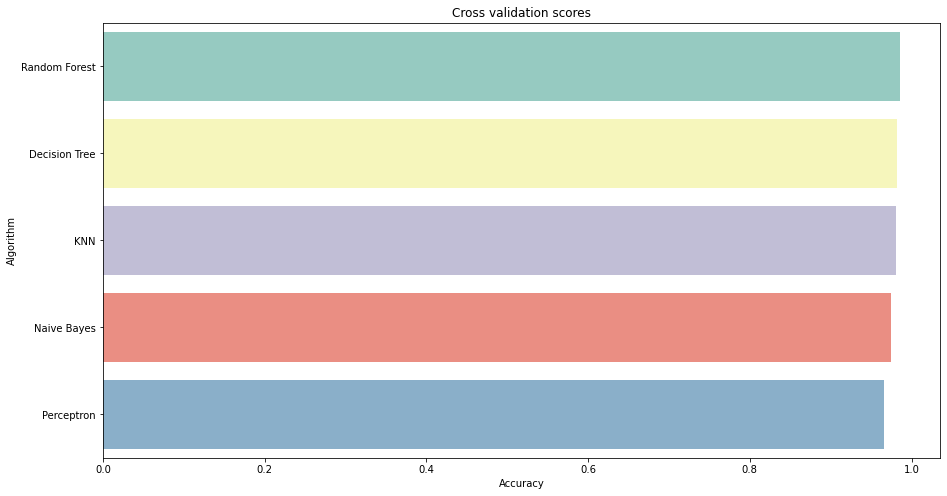

In [76]:
res2 = pd.DataFrame({"ACC":MLA_compare['Mean'],"Std":MLA_compare['Standard Deviation'],"Algorithm":MLA_compare['Algorithm']})
res2["Type"]= "CrossValid"
g = sns.barplot("ACC","Algorithm",data = res2,palette="Set3",orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Cross validation scores")
rcParams['figure.figsize'] = 15,8

## By Compare Validation with Test Accuracy

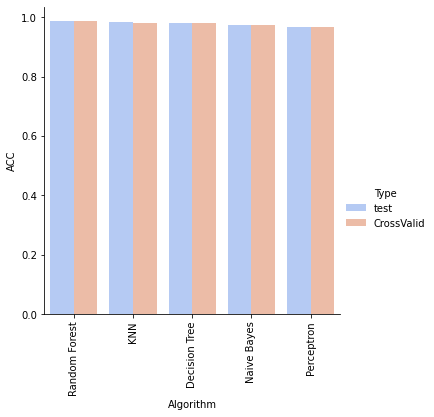

In [83]:
res = pd.concat([res1,res2])
g = sns.factorplot("Algorithm","ACC",hue='Type',palette="coolwarm", data=res, kind='bar')
g.set_xticklabels(rotation=90)

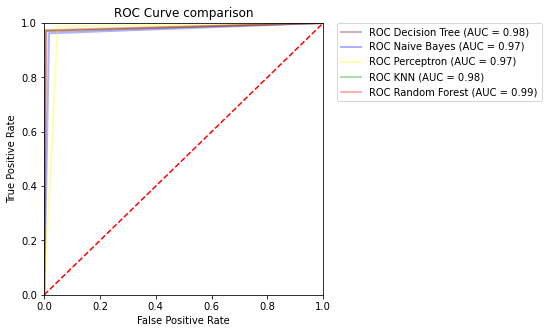

In [85]:
names=names=['Decision Tree','Naive Bayes','Perceptron','KNN','Random Forest']
FP =[fp1,fp2,fp3,fp4,fp5]
TP=[tp1,tp2,tp3,tp4,tp5]
AUC=[dt_auc,nb_auc,p_auc,knn_auc,clf_auc]

colors=['maroon','blue',"yellow","green","red"]

i=0
for i in range (0,5):
    plt.plot(FP[i], TP[i], lw=2, alpha=0.3,color=colors[i],label='ROC %s (AUC = %0.2f)'  % (names[i], AUC[i]))
    i+=1
    
plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')   
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

In [98]:
pred = [clf_y_pred,p_y_pred,knn_y_pred, dt_y_pred,nb_y_pred]
names=['Random Forest','Perceptron','KNN','Decision Tree','Naive Bayes']

for i in range(0,5):
    print(names[i],'\n')
    print ( classification_report (y_test,pred[i]) ) 
    print('-------------------------------------------------------')

Random Forest 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       520
           1       1.00      0.97      0.98       421

    accuracy                           0.99       941
   macro avg       0.99      0.99      0.99       941
weighted avg       0.99      0.99      0.99       941

-------------------------------------------------------
Perceptron 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       520
           1       0.94      0.99      0.97       421

    accuracy                           0.97       941
   macro avg       0.97      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941

-------------------------------------------------------
KNN 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       520
           1       1.00      0.97      0.98       421

    accuracy                       